# Mehrab Kalantary - 99222088
# Adaptive Leaky Integrate And Fire Model
# 

<img src="alif equation.jpg" width=1000 height=1000 />

In [1]:
import numpy as np
from matplotlib.pyplot import *
import random
import math

# I Functions
* I Interval: fixed flow in a specific duration
* I Linear: linear i function
* I Sine: sine i function
* I Constant: constant i function
* I Step: step by step fixed flow in specific durations

In [2]:
def i_interval(time, i=5, duration=(20, 80)):
    """I(t) = 5"""
    start, end = duration
    if start < time < end:
        return i
    return 0


def i_linear(time, c=2):
    """I(t) = 2.t"""
    return c * time


def i_sine(time, c=10):
    """I(t) = 10.(sin(t) + 0.9)"""
    return c * (0.9 + math.sin(time))


def i_constant(time, i=5):
    """I(t) = 5"""
    return i


def i_step(time, i=5, d1=(20, 30), d2=(40, 70)):
    """I(t) = 5"""
    s1, e1 = d1
    s2, e2 = d2
    if s1 < time < e1 or s2 < time < e2:
        return i
    return 0

# Implement ALIF Class 
* time: time duration
* dt: steps for measuring potential
* i_function: function to calculate flow
* u_rest: resting potential
* r: circuit resistance
* c: capacitor capacity
* threshold: action potential
* a: subthreshold adaptation
* b: spike-triggered adaptation 
* w_constant: a constant for adaptation coefficient

# 
# How To Code Potential List
* we can use steps to calculate a list of potentials
# 

<img src="ualif.jpg" width=1000 height=1000 />

# How To Code Adaptation
* we can use steps to calculate a list of adaptation coefficient
# 
<img src="a.jpg" width=1000 height=1000 />

In [3]:
class ALIF:
    def __init__(self, time=100, dt=0.125, i_function=i_interval, u_rest=0, r=1, c=10, threshold=2,
                 a=2, b=2, w_constant=5):
        self.time = time
        self.dt = dt
        self.i_function = i_function
        self.u_rest = u_rest
        self.r = r
        self.c = c
        self.threshold = threshold
        self.a = a
        self.b = b
        self.w_constant = w_constant
        self.u = []
        self.init_u()
        
    def spike_time(self, i):
        timer = np.arange(0, self.time + self.dt, self.dt)
        time_const = self.r * self.c
        u = [self.u_rest for i in range(len(timer))]
        w = [0 for _ in range(len(timer))]
        i_input = [i_constant(j, i=i) for j in timer]
        sigma_delta_function = 0
        spike_t = self.time
        current_spike_time = 0
        
        for j in range(len(timer)):
            u[j] = u[j - 1] + ((self.r * i_input[j] - (u[j - 1] - self.u_rest) - self.r * w[j - 1]) 
                               / time_const) * self.dt
            if u[j] >= self.threshold:
                sigma_delta_function = 1
                u[j] = self.u_rest
                prev_spike_time = current_spike_time
                current_spike_time = timer[j]
                spike_t = min(spike_t, current_spike_time - prev_spike_time)
            w[j] = w[j - 1] + (self.a * (u[j - 1] - self.u_rest)
                               - w[j - 1] + self.b * self.w_constant *
                               sigma_delta_function) * self.dt / self.w_constant
            sigma_delta_function = 0
                
        return spike_t

    def init_u(self):
        timer = np.arange(0, self.time + self.dt, self.dt)
        time_const = self.r * self.c
        u = [self.u_rest for i in range(len(timer))]
        w = [0 for _ in range(len(timer))]
        i_input = [self.i_function(j) for j in timer]
        sigma_delta_function = 0
        
        for j in range(len(timer)):
            u[j] = u[j - 1] + ((self.r * i_input[j] - (u[j - 1] - self.u_rest) - self.r * w[j - 1]) 
                               / time_const) * self.dt
            if u[j] >= self.threshold:
                sigma_delta_function = 1
                u[j] = self.u_rest
            w[j] = w[j - 1] + (self.a * (u[j - 1] - self.u_rest)
                               - w[j - 1] + self.b * self.w_constant *
                               sigma_delta_function) * self.dt / self.w_constant
            sigma_delta_function = 0
                
        self.u = u

    def plot(self, u_t=False, i_t=False, f_i=False):
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle('Adaptive Leaky Integrate and Fire\n\n' +
                     "R: " + str(self.r) +
                     "    C: " + str(self.c) +
                     "    I: " + (str(self.i_function.__doc__).strip()) +
                     "    THRESHOLD: " + str(self.threshold) + 
                     "    a: " + str(self.a) + 
                     "    b: " + str(self.b) + 
                     "    tw: " + str(self.w_constant), fontsize=14, fontweight='bold')
        
        timer = np.arange(0, self.time + self.dt, self.dt)
        i_input = [self.i_function(j) for j in timer]
        
        if u_t:
            subplot(221)
            plot(timer, self.u)
            ylabel('U')
            xlabel('Time')
            title('U - Time plot')
            grid(True)
                
        if i_t:
            subplot(221)
            plot(timer, i_input)
            ylabel('I')
            xlabel('Time')
            title('I - Time plot')
            grid(True)
            
        if f_i:
            time_const = self.r * self.c
            i_x = np.arange(0, max(i_input), self.dt)
            i_y = [0 for _ in range(len(i_x))]
            
            for j in range(len(i_x)):
                try:
                    i_y[j] = 1 / (self.spike_time(i=i_x[j]))
                except:
                    i_y[j] = 0
            subplot(221)
            plot(i_x, i_y)
            ylabel('F')
            xlabel('I')
            title('F - I plot')
            grid(True)

# Subthreshold Adaptation Effect
* by increasing a-constant, potential has more willing to its rest

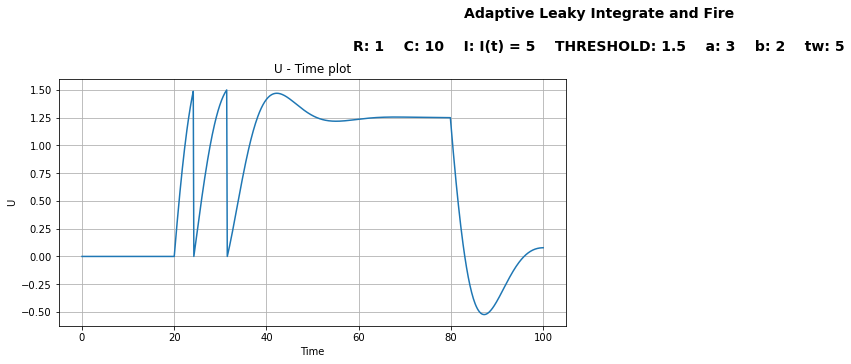

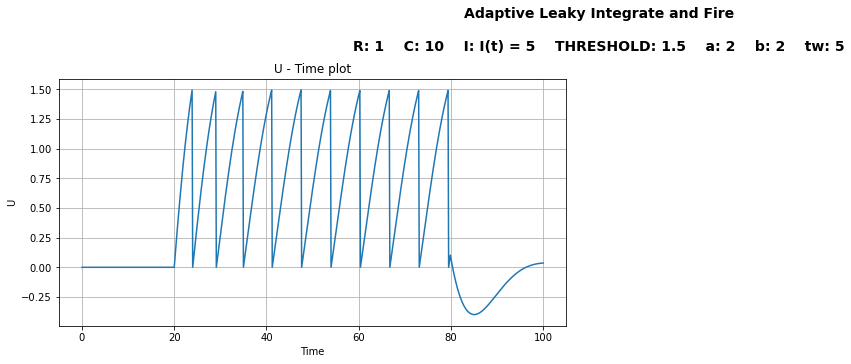

In [9]:
alif = ALIF(threshold=1.5, a=3)
alif.plot(u_t=True)

alif = ALIF(threshold=1.5, a=2)
alif.plot(u_t=True)

# Spike-Triggered Adaptation Effect
* we have more adaptation when neuron spikes, by increasing b-constant
* by increasing this value, model needs more time to get to next spike

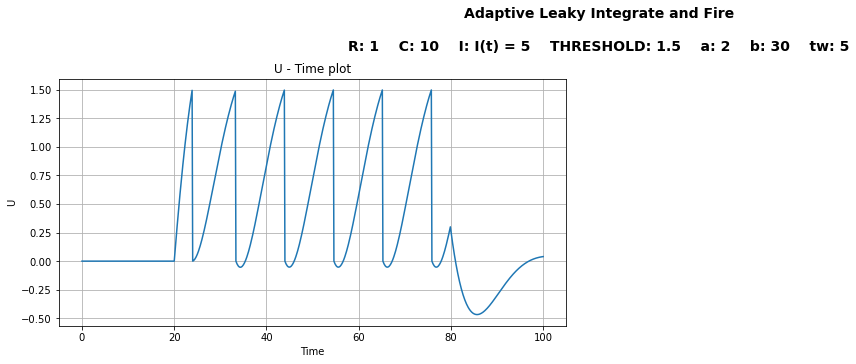

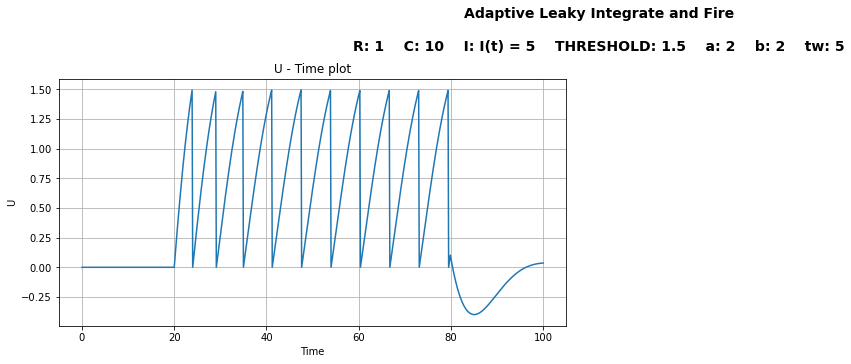

In [14]:
alif = ALIF(threshold=1.5, b=30)
alif.plot(u_t=True)

alif = ALIF(threshold=1.5, b=2)
alif.plot(u_t=True)

# W-Constant Effect
* by increasing w-constant we achieve better adaptation

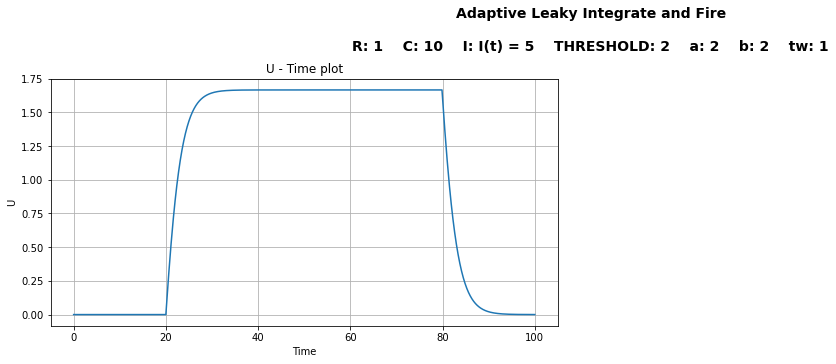

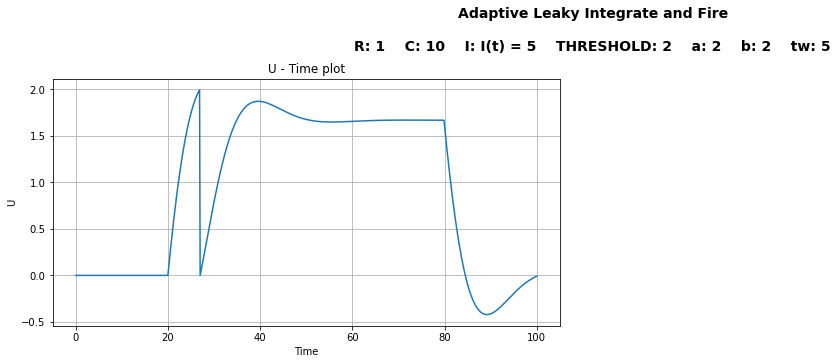

In [16]:
alif = ALIF(threshold=2, w_constant=1)
alif.plot(u_t=True)

alif = ALIF(threshold=2, w_constant=5)
alif.plot(u_t=True)

# Samples
* now we use each i function to figure 

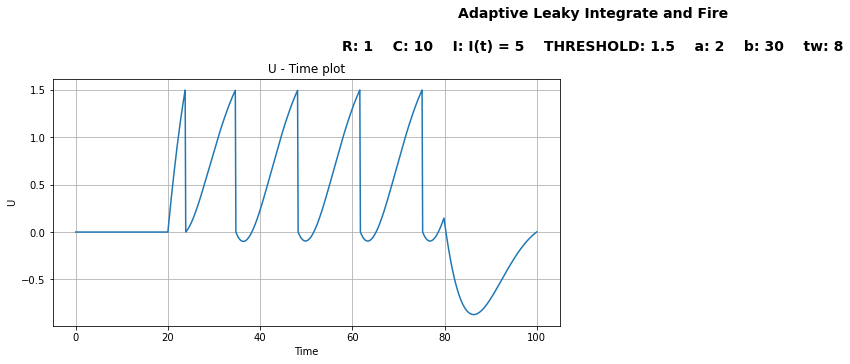

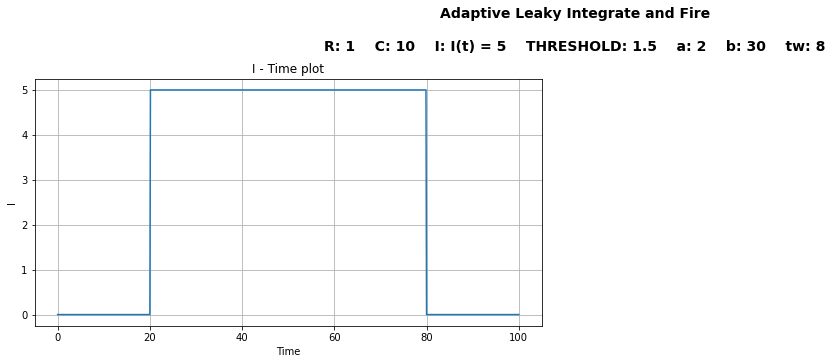

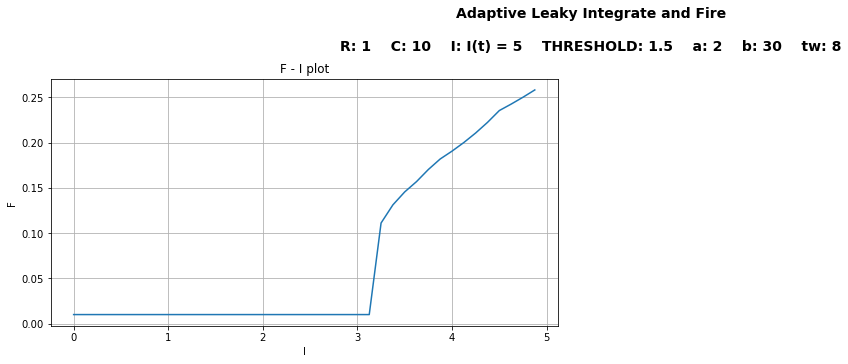

In [9]:
alif = ALIF(i_function=i_interval, threshold=1.5, b=30, w_constant=8)
alif.plot(u_t=True)
alif.plot(i_t=True)
alif.plot(f_i=True)

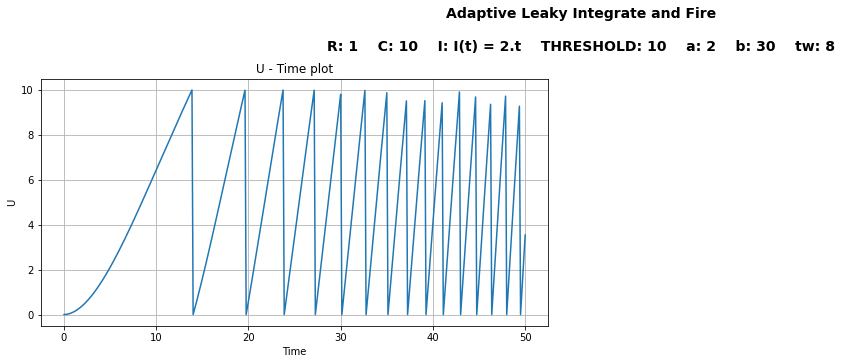

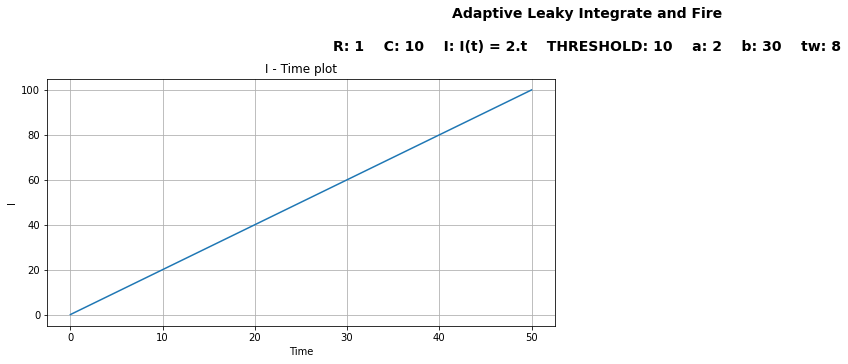

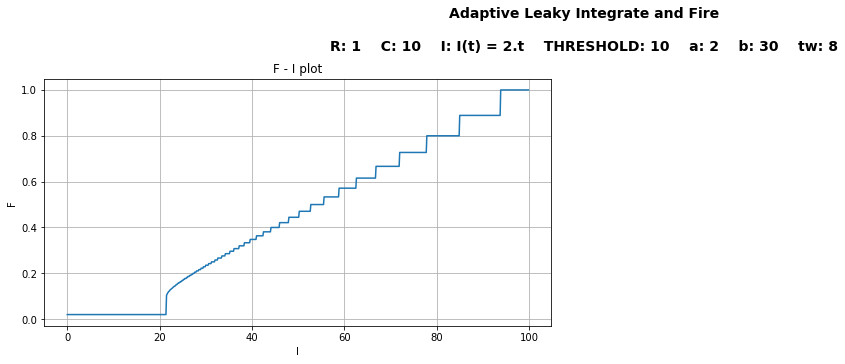

In [12]:
alif = ALIF(i_function=i_linear, time=50, threshold=10, b=30, w_constant=8)
alif.plot(u_t=True)
alif.plot(i_t=True)
alif.plot(f_i=True)

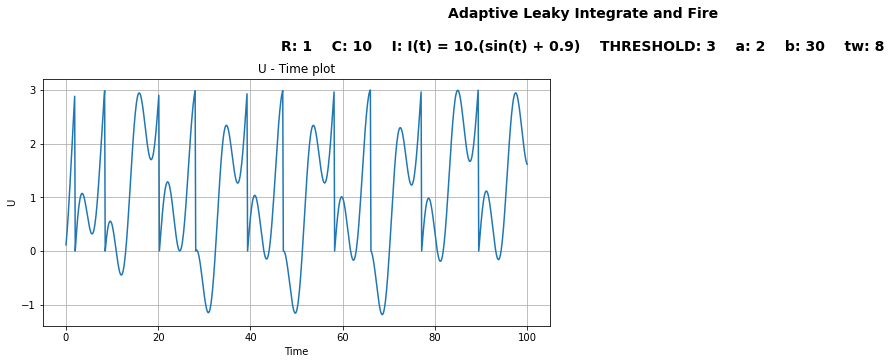

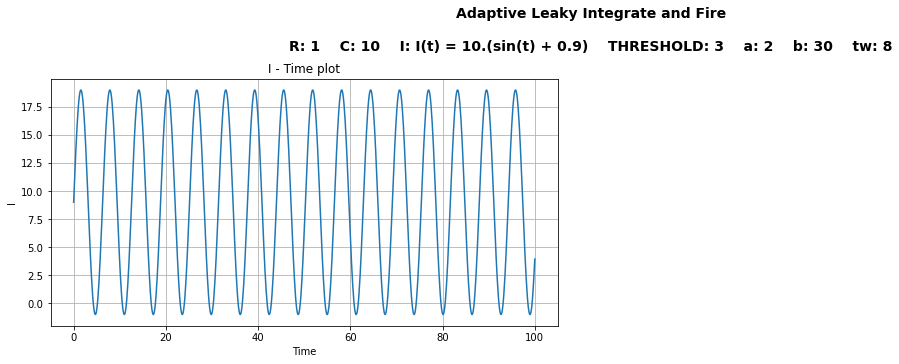

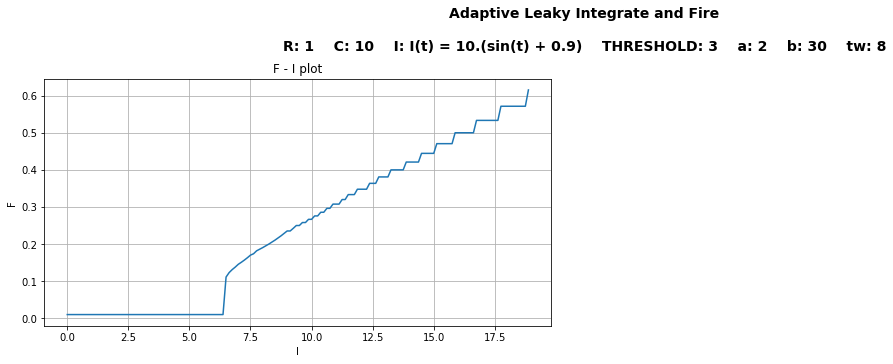

In [13]:
alif = ALIF(i_function=i_sine, threshold=3, b=30, w_constant=8)
alif.plot(u_t=True)
alif.plot(i_t=True)
alif.plot(f_i=True)

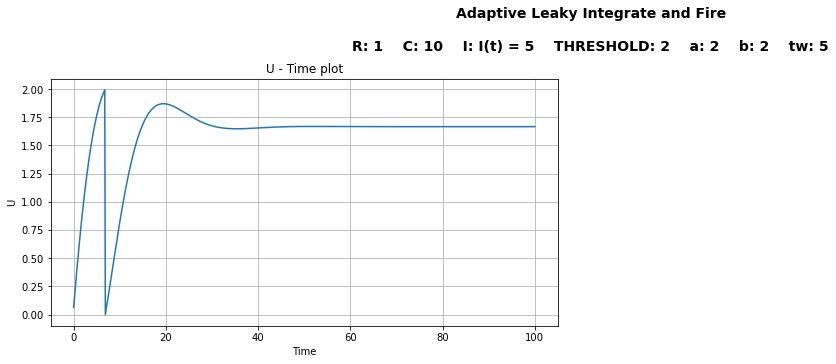

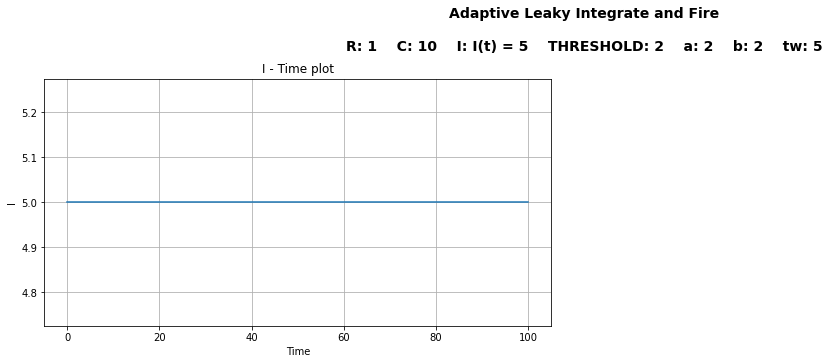

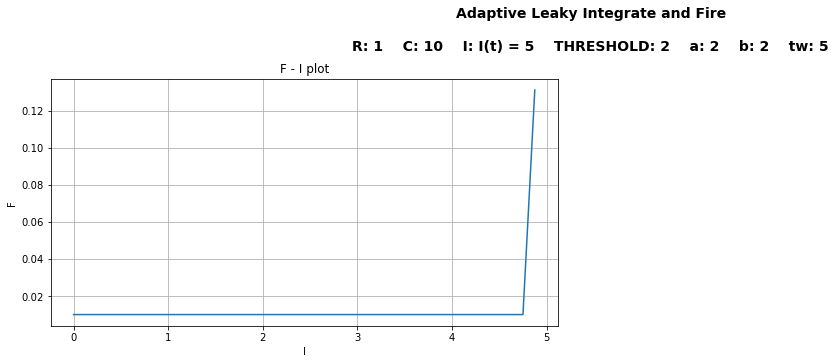

In [23]:
alif = ALIF(i_function=i_constant)
alif.plot(u_t=True)
alif.plot(i_t=True)
alif.plot(f_i=True)

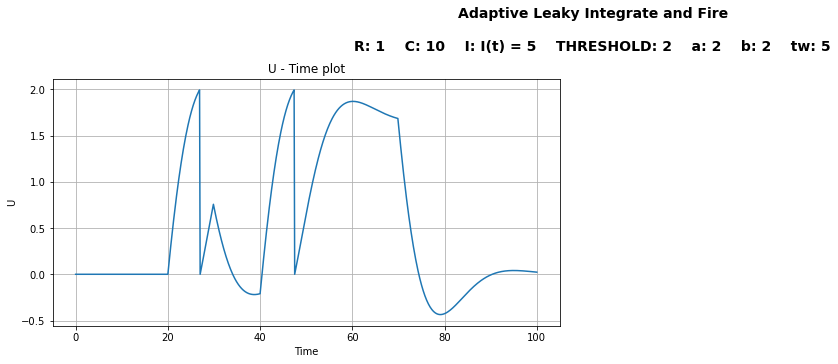

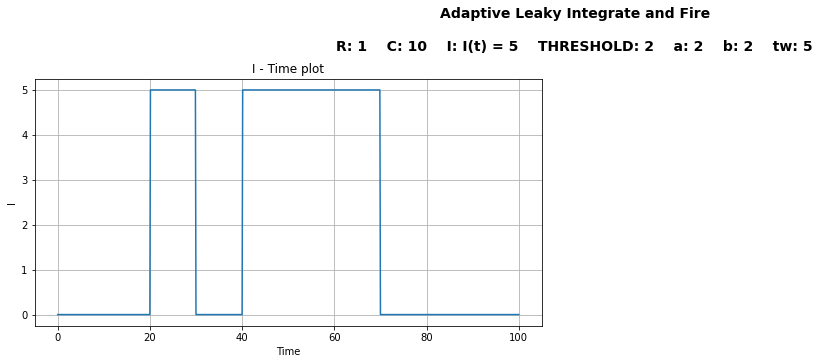

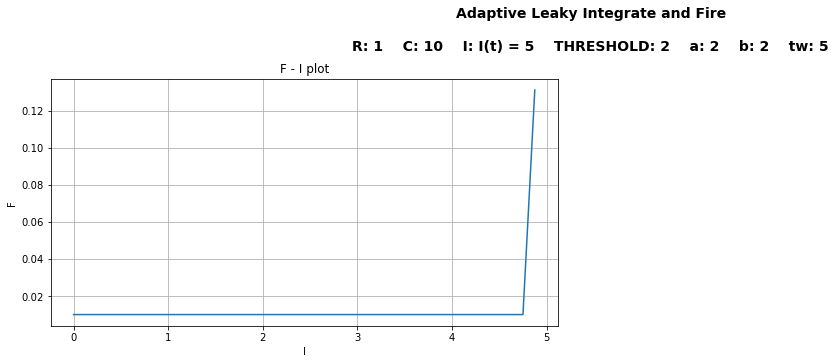

In [25]:
alif = ALIF(i_function=i_step, threshold=2)
alif.plot(u_t=True)
alif.plot(i_t=True)
alif.plot(f_i=True)